# **Supervised Learning**

This notebook investigates whether movements in S&P 500 and ASX 200 affect the NZX 50. Supervised learning models have been used to model the relationship and evaluate the performance.

# **Contents**
* [1. Problem Definition](#problem)
* [2. Loading data and python packages](#1)
    * [2.1. Loading python packages](#1.1)    
    * [2.2. Data download](#1.2)
* [3. Dataset Creation](#2)
* [4. Exploratory Data Analysis](#3)
    * [4.1. Descriptive Statistics](#3.1)    
    * [4.2. Data Visualisation](#3.2)
* [5. Feature Engineering](#4)
   
* [6.Evaluate Algorithms and Models](#5)        
    * [6.1. Linear Regression](#5.1)
    * [6.2. Multiple Linear Regression](#5.2)
    * [6.3. Lasso Regression](#5.3)
    * [6.4. Logistic Regression](#5.4)
* [7.Conclusion](#6)
* [8.References](#7)   



<a id='problem'></a>
# **1. Problem Definition**

> Stock markets around the world show interconnected behaviors. Investors who want to diversify need to understand relationships between major stock indices. This study focuses on connection between sp500 and asx200 with nzx50.

<a id='1'></a>
# **2. Loading data and python packages**


<a id='1.1'></a>
## **2.1. Loading python packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<a id='1.2'></a>
## **2.2. Data Download**

In [2]:
nzx50= yf.download('^NZ50', start='2010-01-01', end='2024-09-01')
sp500= yf.download('^GSPC', start='2010-01-01', end='2024-09-01')
asx200= yf.download('^AXJO', start='2010-01-01', end='2024-09-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
nzx50.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-05,3230.149902,3271.290039,3230.149902,3268.189941,3268.189941,15713800
2010-01-06,3268.189941,3272.139893,3263.459961,3271.570068,3271.570068,17077000
2010-01-07,3271.570068,3286.610107,3270.810059,3284.810059,3284.810059,47356800
2010-01-08,3284.810059,3313.179932,3284.810059,3310.229980,3310.229980,19330800
2010-01-11,3310.229980,3310.229980,3297.790039,3303.750000,3303.750000,28157000


In [4]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [5]:
nzx50=nzx50[['Adj Close', 'Volume']]
sp500= sp500[['Adj Close', 'Volume']]
asx200= asx200[['Adj Close', 'Volume']]

In [6]:
nzx50

,Adj Close,Volume
Date,,
2010-01-05,3268.189941,15713800
2010-01-06,3271.570068,17077000
2010-01-07,3284.810059,47356800
2010-01-08,3310.229980,19330800
2010-01-11,3303.750000,28157000
...,...,...
2024-08-26,12589.830078,19469500
2024-08-27,12451.110352,28692900
2024-08-28,12470.599609,35344500


In [7]:
nzx50.isnull().sum()
sp500.isnull().sum()
asx200.isnull().sum()

,0
Adj Close,0
Volume,0


<a id='2'></a>
# **3. Creating Dataset**

In [8]:
df= pd.DataFrame({'nzx50': nzx50['Adj Close'],
                  'nzx_Volume': nzx50['Volume'],
                  'sp500': sp500['Adj Close'],
                  'sp500_Volume': sp500['Volume'],
                  'asx200': asx200['Adj Close'],
                  'asx200_Volume': asx200['Volume']})

In [9]:
df

,nzx50,nzx_Volume,sp500,sp500_Volume,asx200,asx200_Volume
Date,,,,,,
2010-01-04,NaN,NaN,1132.989990,3.991400e+09,4876.299805,0.0
2010-01-05,3268.189941,15713800.0,1136.520020,2.491020e+09,4924.299805,0.0
2010-01-06,3271.570068,17077000.0,1137.140015,4.972660e+09,4921.399902,0.0
2010-01-07,3284.810059,47356800.0,1141.689941,5.270680e+09,4899.399902,0.0
2010-01-08,3310.229980,19330800.0,1144.979980,4.389590e+09,4912.100098,0.0
...,...,...,...,...,...,...
2024-08-26,12589.830078,19469500.0,5616.839844,2.938570e+09,8084.500000,553600.0
2024-08-27,12451.110352,28692900.0,5625.799805,2.798990e+09,8071.200195,656600.0
2024-08-28,12470.599609,35344500.0,5592.180176,3.053450e+09,8071.399902,743500.0


In [10]:
#Looking for missing values
df.isnull().sum()

,0
nzx50,187
nzx_Volume,187
sp500,95
sp500_Volume,95
asx200,86
asx200_Volume,86


In [11]:
#Filling the missing value with forward and backward fill.
df['nzx50']= df['nzx50'].fillna(method='bfill')
df['nzx_Volume']= df['nzx_Volume'].fillna(method='bfill')
df['sp500']= df['sp500'].fillna(method='ffill')
df['sp500_Volume']= df['sp500_Volume'].fillna(method='ffill')
df['asx200']= df['asx200'].fillna(method='ffill')
df['asx200_Volume']= df['asx200_Volume'].fillna(method='ffill')

<ipython-input-11-349038bf0d53>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['nzx50']= df['nzx50'].fillna(method='bfill')
<ipython-input-11-349038bf0d53>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['nzx_Volume']= df['nzx_Volume'].fillna(method='bfill')
<ipython-input-11-349038bf0d53>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['sp500']= df['sp500'].fillna(method='ffill')
<ipython-input-11-349038bf0d53>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['sp500_Volume']= df['sp500_Volume'].fillna(method='ffill')
<ipython-input-11-349038bf0d53>:6: FutureWarning: Series.fillna with 'method' is deprecated and will rai

<a id='3'></a>
# **4. Exploratory Data Analysis**

<a id='3.1'></a>
## **4.1. Descriptive Analysis**

In [12]:
df.shape

(3785, 6)

In [13]:
df.isnull().sum()

,0
nzx50,0
nzx_Volume,0
sp500,0
sp500_Volume,0
asx200,0
asx200_Volume,0


In [14]:
df.describe()

,nzx50,nzx_Volume,sp500,sp500_Volume,asx200,asx200_Volume
count,3785.000000,3.785000e+03,3785.000000,3.785000e+03,3785.000000,3.785000e+03
mean,7824.162458,3.331196e+07,2658.752370,3.927913e+09,5839.113344,5.956866e+07
std,3408.523375,2.336285e+07,1188.967450,9.552784e+08,1039.960536,1.863351e+08
min,2933.820068,0.000000e+00,1022.580017,1.025000e+09,3863.899902,0.000000e+00
25%,4634.899902,2.290380e+07,1689.369995,3.360480e+09,5029.500000,0.000000e+00
50%,7421.779785,3.067130e+07,2387.449951,3.776100e+09,5722.399902,0.000000e+00
75%,11451.049805,4.008870e+07,3678.429932,4.298710e+09,6749.700195,6.875000e+05
max,13558.190430,4.754292e+08,5667.200195,1.061781e+10,8114.700195,1.353735e+09


In [15]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22',
               '2024-08-23', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30'],
              dtype='datetime64[ns]', name='Date', length=3785, freq=None)

In [16]:
df.columns

Index(['nzx50', 'nzx_Volume', 'sp500', 'sp500_Volume', 'asx200',
       'asx200_Volume'],
      dtype='object')

In [17]:
df.dtypes

,0
nzx50,float64
nzx_Volume,float64
sp500,float64
sp500_Volume,float64
asx200,float64
asx200_Volume,float64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3785 entries, 2010-01-04 to 2024-08-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nzx50          3785 non-null   float64
 1   nzx_Volume     3785 non-null   float64
 2   sp500          3785 non-null   float64
 3   sp500_Volume   3785 non-null   float64
 4   asx200         3785 non-null   float64
 5   asx200_Volume  3785 non-null   float64
dtypes: float64(6)
memory usage: 207.0 KB


<a id='3.2'></a>
## **4.2. Data Visualization**

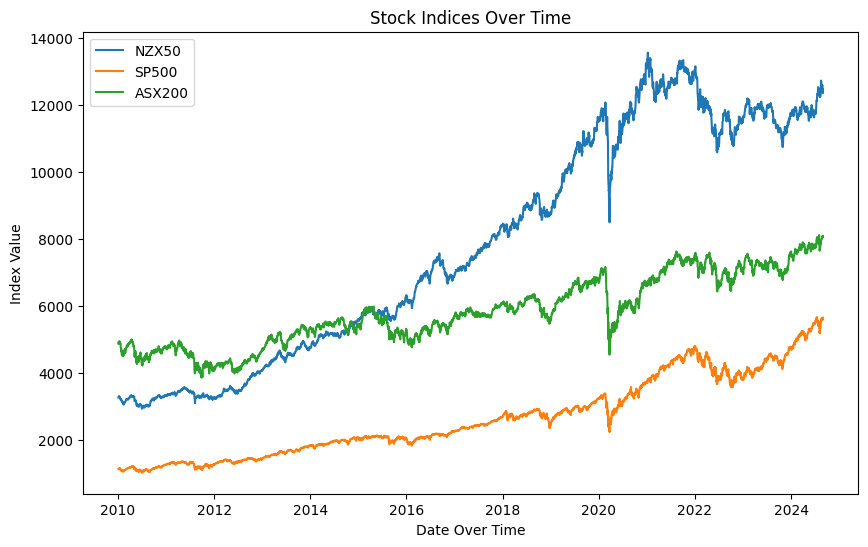

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df.nzx50, label= 'NZX50' )
plt.plot(df.sp500, label= 'SP500' )
plt.plot(df.asx200, label= 'ASX200' )
plt.title('Stock Indices Over Time')
plt.xlabel('Date Over Time')
plt.ylabel('Index Value')
plt.legend()
plt.show()


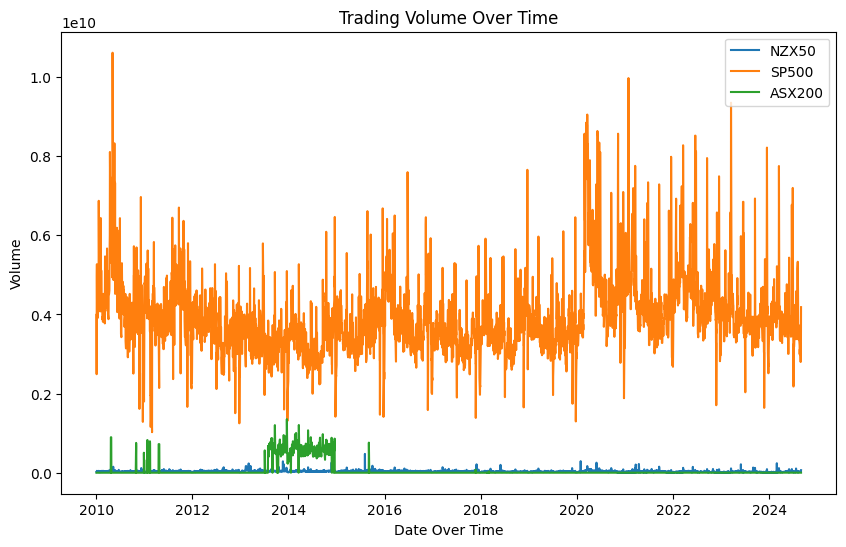

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df.nzx_Volume, label= 'NZX50' )
plt.plot(df.index,df.sp500_Volume, label= 'SP500' )
plt.plot(df.index,df.asx200_Volume, label= 'ASX200' )
plt.title('Trading Volume Over Time')
plt.xlabel('Date Over Time')
plt.ylabel('Volume')
plt.legend(loc='upper right')
plt.show()

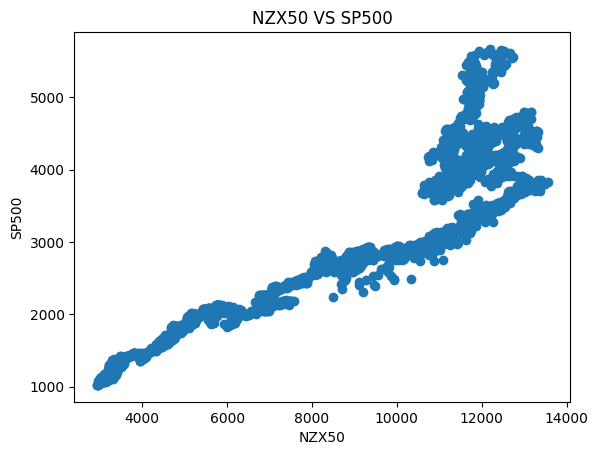

In [21]:
plt.scatter(df['nzx50'], df['sp500'])
plt.title('NZX50 VS SP500')
plt.xlabel('NZX50')
plt.ylabel('SP500')
plt.show()

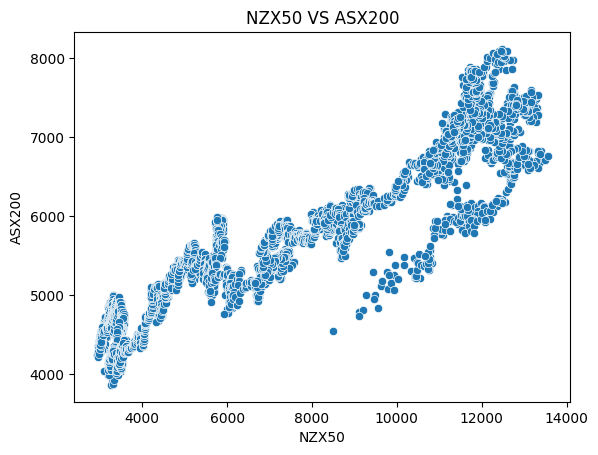

In [22]:
sns.scatterplot(data=df, x='nzx50', y='asx200')
plt.title('NZX50 VS ASX200')
plt.xlabel('NZX50')
plt.ylabel('ASX200')
plt.show()

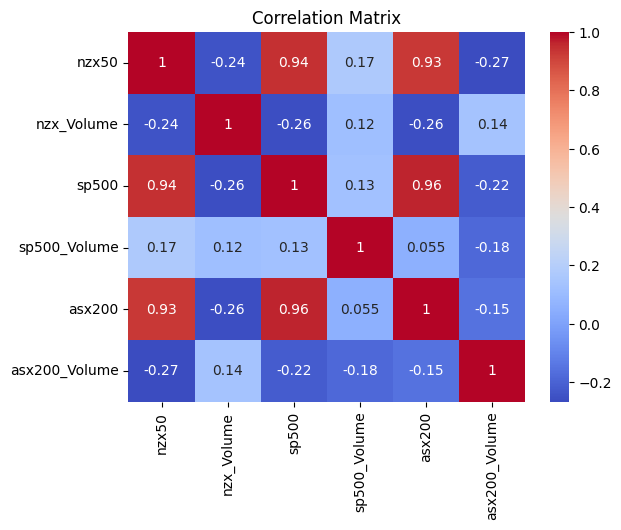

In [23]:
corr= df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

>> From the above analysis, we can see that NZX50 is strongly corelated with sp500(0.94) and asx200(0.93).

<a id='4'></a>
# **5. Feature Engineering**

In [24]:
df

,nzx50,nzx_Volume,sp500,sp500_Volume,asx200,asx200_Volume
Date,,,,,,
2010-01-04,3268.189941,15713800.0,1132.989990,3.991400e+09,4876.299805,0.0
2010-01-05,3268.189941,15713800.0,1136.520020,2.491020e+09,4924.299805,0.0
2010-01-06,3271.570068,17077000.0,1137.140015,4.972660e+09,4921.399902,0.0
2010-01-07,3284.810059,47356800.0,1141.689941,5.270680e+09,4899.399902,0.0
2010-01-08,3310.229980,19330800.0,1144.979980,4.389590e+09,4912.100098,0.0
...,...,...,...,...,...,...
2024-08-26,12589.830078,19469500.0,5616.839844,2.938570e+09,8084.500000,553600.0
2024-08-27,12451.110352,28692900.0,5625.799805,2.798990e+09,8071.200195,656600.0
2024-08-28,12470.599609,35344500.0,5592.180176,3.053450e+09,8071.399902,743500.0


In [25]:
# Calculating returns to see how much the percentage value has change
df['nzx50 Returns']= df['nzx50'].pct_change()
df['sp500 Returns']= df['sp500'].pct_change()
df['asx200 Returns']= df['asx200'].pct_change()

> *Financial Market have delayed reactions, past movements can influence the market for several days. Adding a lag features helps to account for impact of previous day value of SP500 and ASX200, and their volume to NZX50.*


In [26]:
#Creating a lag feature in order to compare present value with previous day

df['sp500_lags1']= df['sp500'].shift(1)
df['asx200_lags1']= df['asx200'].shift(1)
df['sp500_lags5']= df['sp500'].shift(5)
df['asx200_lags5']= df['asx200'].shift(5)

df['sp500_Lags10']= df['sp500'].shift(10)
df['asx200_lags10']= df['asx200'].shift(10)
df['sp500_Lags20']= df['sp500'].shift(20)
df['asx200_lags20']= df['asx200'].shift(20)

In [27]:
df

,nzx50,nzx_Volume,sp500,sp500_Volume,asx200,asx200_Volume,nzx50 Returns,sp500 Returns,asx200 Returns,sp500_lags1,asx200_lags1,sp500_lags5,asx200_lags5,sp500_Lags10,asx200_lags10,sp500_Lags20,asx200_lags20
Date,,,,,,,,,,,,,,,,,
2010-01-04,3268.189941,15713800.0,1132.989990,3.991400e+09,4876.299805,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,3268.189941,15713800.0,1136.520020,2.491020e+09,4924.299805,0.0,0.000000,0.003116,0.009844,1132.989990,4876.299805,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,3271.570068,17077000.0,1137.140015,4.972660e+09,4921.399902,0.0,0.001034,0.000546,-0.000589,1136.520020,4924.299805,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,3284.810059,47356800.0,1141.689941,5.270680e+09,4899.399902,0.0,0.004047,0.004001,-0.004470,1137.140015,4921.399902,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,3310.229980,19330800.0,1144.979980,4.389590e+09,4912.100098,0.0,0.007739,0.002882,0.002592,1141.689941,4899.399902,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,12589.830078,19469500.0,5616.839844,2.938570e+09,8084.500000,553600.0,0.004776,-0.003154,0.007552,5634.609863,8023.899902,5608.250000,7980.399902,5344.390137,7813.700195,5463.540039,7989.600098
2024-08-27,12451.110352,28692900.0,5625.799805,2.798990e+09,8071.200195,656600.0,-0.011018,0.001595,-0.001645,5616.839844,8084.500000,5597.120117,7997.700195,5434.430176,7826.799805,5436.439941,7953.200195
2024-08-28,12470.599609,35344500.0,5592.180176,3.053450e+09,8071.399902,743500.0,0.001565,-0.005976,0.000025,5625.799805,8071.200195,5620.850098,8010.500000,5455.209961,7850.700195,5522.299805,8092.299805


In [28]:
#To check whether returns were up or down
df['nzx50 Direction']= (df['nzx50 Returns']>0).astype(int)
df['sp500 Direction']= (df['sp500 Returns']>0).astype(int)
df['asx200 Direction']= (df['asx200 Returns']>0).astype(int)

In [29]:
df

,nzx50,nzx_Volume,sp500,sp500_Volume,asx200,asx200_Volume,nzx50 Returns,sp500 Returns,asx200 Returns,sp500_lags1,asx200_lags1,sp500_lags5,asx200_lags5,sp500_Lags10,asx200_lags10,sp500_Lags20,asx200_lags20,nzx50 Direction,sp500 Direction,asx200 Direction
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,3268.189941,15713800.0,1132.989990,3.991400e+09,4876.299805,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2010-01-05,3268.189941,15713800.0,1136.520020,2.491020e+09,4924.299805,0.0,0.000000,0.003116,0.009844,1132.989990,4876.299805,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
2010-01-06,3271.570068,17077000.0,1137.140015,4.972660e+09,4921.399902,0.0,0.001034,0.000546,-0.000589,1136.520020,4924.299805,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
2010-01-07,3284.810059,47356800.0,1141.689941,5.270680e+09,4899.399902,0.0,0.004047,0.004001,-0.004470,1137.140015,4921.399902,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
2010-01-08,3310.229980,19330800.0,1144.979980,4.389590e+09,4912.100098,0.0,0.007739,0.002882,0.002592,1141.689941,4899.399902,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,12589.830078,19469500.0,5616.839844,2.938570e+09,8084.500000,553600.0,0.004776,-0.003154,0.007552,5634.609863,8023.899902,5608.250000,7980.399902,5344.390137,7813.700195,5463.540039,7989.600098,1,0,1
2024-08-27,12451.110352,28692900.0,5625.799805,2.798990e+09,8071.200195,656600.0,-0.011018,0.001595,-0.001645,5616.839844,8084.500000,5597.120117,7997.700195,5434.430176,7826.799805,5436.439941,7953.200195,0,1,0
2024-08-28,12470.599609,35344500.0,5592.180176,3.053450e+09,8071.399902,743500.0,0.001565,-0.005976,0.000025,5625.799805,8071.200195,5620.850098,8010.500000,5455.209961,7850.700195,5522.299805,8092.299805,1,0,1


In [30]:
#Dropping all the missing values
df.dropna(inplace=True)

In [31]:
df

,nzx50,nzx_Volume,sp500,sp500_Volume,asx200,asx200_Volume,nzx50 Returns,sp500 Returns,asx200 Returns,sp500_lags1,asx200_lags1,sp500_lags5,asx200_lags5,sp500_Lags10,asx200_lags10,sp500_Lags20,asx200_lags20,nzx50 Direction,sp500 Direction,asx200 Direction
Date,,,,,,,,,,,,,,,,,,,,
2010-02-01,3150.969971,11390800.0,1089.189941,4.077610e+09,4524.100098,0.0,-0.004323,0.014266,-0.009957,1073.869995,4569.600098,1096.780029,4717.899902,1136.030029,4911.100098,1132.989990,4876.299805,0,1,0
2010-02-02,3147.370117,21317800.0,1103.319946,4.749540e+09,4605.299805,0.0,-0.001142,0.012973,0.017948,1089.189941,4524.100098,1092.170044,4717.899902,1150.229980,4861.200195,1136.520020,4924.299805,0,1,1
2010-02-03,3135.110107,33332000.0,1097.280029,4.285450e+09,4647.899902,0.0,-0.003895,-0.005474,0.009250,1103.319946,4605.299805,1097.500000,4644.600098,1138.040039,4868.200195,1137.140015,4921.399902,0,0,1
2010-02-04,3148.939941,27354200.0,1063.109985,5.859690e+09,4621.600098,0.0,0.004411,-0.031141,-0.005658,1097.280029,4647.899902,1084.530029,4673.299805,1116.479980,4827.200195,1141.689941,4899.399902,1,0,0
2010-02-05,3104.989990,34651800.0,1066.189941,6.438900e+09,4514.100098,0.0,-0.013957,0.002897,-0.023260,1063.109985,4621.600098,1073.869995,4569.600098,1091.760010,4750.600098,1144.979980,4912.100098,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,12589.830078,19469500.0,5616.839844,2.938570e+09,8084.500000,553600.0,0.004776,-0.003154,0.007552,5634.609863,8023.899902,5608.250000,7980.399902,5344.390137,7813.700195,5463.540039,7989.600098,1,0,1
2024-08-27,12451.110352,28692900.0,5625.799805,2.798990e+09,8071.200195,656600.0,-0.011018,0.001595,-0.001645,5616.839844,8084.500000,5597.120117,7997.700195,5434.430176,7826.799805,5436.439941,7953.200195,0,1,0
2024-08-28,12470.599609,35344500.0,5592.180176,3.053450e+09,8071.399902,743500.0,0.001565,-0.005976,0.000025,5625.799805,8071.200195,5620.850098,8010.500000,5455.209961,7850.700195,5522.299805,8092.299805,1,0,1


In [32]:
df.isnull().sum()

,0
nzx50,0
nzx_Volume,0
sp500,0
sp500_Volume,0
asx200,0
asx200_Volume,0
nzx50 Returns,0
sp500 Returns,0
asx200 Returns,0
sp500_lags1,0


In [33]:
df.columns

Index(['nzx50', 'nzx_Volume', 'sp500', 'sp500_Volume', 'asx200',
       'asx200_Volume', 'nzx50 Returns', 'sp500 Returns', 'asx200 Returns',
       'sp500_lags1', 'asx200_lags1', 'sp500_lags5', 'asx200_lags5',
       'sp500_Lags10', 'asx200_lags10', 'sp500_Lags20', 'asx200_lags20',
       'nzx50 Direction', 'sp500 Direction', 'asx200 Direction'],
      dtype='object')

<a id='5'></a>
# **6. Model Building**

# Using regression and classification  method
Predicting magnitude of NZX50 change with Regression Model and NZX50 Direction (up or down) with classification.

<a id='5.2'></a>
## **6.1. Linear Regression**

Evaluating how global markets influences NZX50 using simple regression model.

In [34]:
X= df[['sp500', 'asx200', 'sp500_Volume','asx200_Volume']]
y=df['nzx50']

In [35]:
#Splitting the data
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [36]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
#Predictions
predictions= lr.predict(X_test)

In [38]:
#Evaluation
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")
print(f"Root Mean Square Error: { np.sqrt(mean_squared_error(y_test, predictions))}")
print(f"R2_Score: {r2_score(y_test,predictions)}")

Mean Absolute Error: 790.2744024855847
Mean Squared Error: 1121624.7798008886
Root Mean Square Error: 1059.067882527314
R2_Score: 0.9052711979162249


> Mean Squared Error of 1121624.77 indicates that average of squared differences between actual and predicted is quite large, indicating that some predictions may significantly deviate from the actual value.

>> R2 score of 0.9052 indicates that 90.52% of the variance in the NZX50 is explained by the model. This indicate that model fits well with the data.

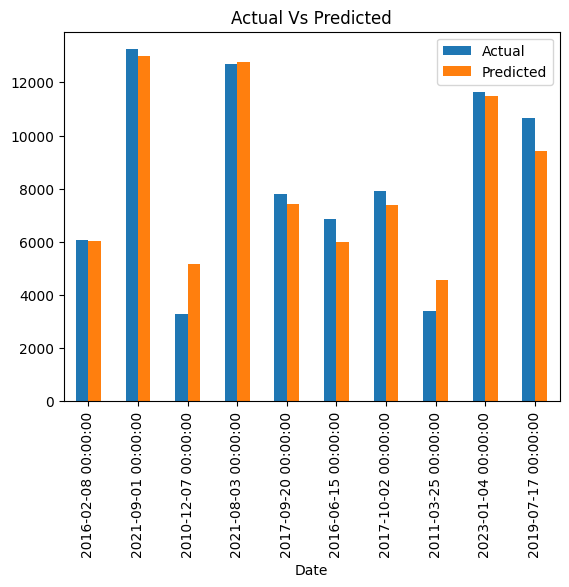

In [39]:
df1= pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
graph= df1.head(10)
graph.plot(kind='bar')
plt.title('Actual Vs Predicted')
plt.show()

<a id='5.2'></a>
## **6.2. Multiple Feature Linear Regression**

Lagged features has been added to the features to see their significance to the model.

In [40]:
X=df[['sp500', 'asx200', 'sp500_lags1', 'asx200_lags1', 'sp500_lags5', 'asx200_lags5', 'sp500_Lags10', 'asx200_lags10', 'sp500_Lags20', 'asx200_lags20', 'sp500_Volume','asx200_Volume' ]]
y= df['nzx50']

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [42]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
preds= lr.predict(X_test)

In [44]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, preds)}")
print(f"Mean Absolute Error: {mean_squared_error(y_test, preds)}")
print(f"Root Mean Square Error: { np.sqrt(mean_squared_error(y_test, preds))}")
print(f"R2_Score: {r2_score(y_test,preds)}")

Mean Absolute Error: 786.4094452864257
Mean Absolute Error: 1120746.1163190738
Root Mean Square Error: 1058.652972564227
R2_Score: 0.9053454069927057


> There has been slight improvement in the score and this can provide additional information with predictions, but not enough to cause large shift.R2 score of 0.9053 indicates that 90.53% of the variance in the NZX50 is explained by the model. This indicate that model fits well with the data.

>> The outcome suggested that when lagged features are added to the model it provides more context and temporal relationships, the immediate values of SP500 and ASX200 remain the critical feature in predicting the NZX50 movements.

In [45]:
df1= pd.DataFrame({'Actual': y_test, 'Predicted': preds})

In [46]:
df1.head(10)

,Actual,Predicted
Date,,
2016-02-08,6071.310059,5985.459379
2021-09-01,13243.490234,13054.958958
2010-12-07,3281.860107,5092.655884
2021-08-03,12700.500000,12726.972355
2017-09-20,7819.240234,7467.099560
2016-06-15,6869.560059,6086.739515
2017-10-02,7928.890137,7400.490773
2011-03-25,3388.610107,4538.144358
2023-01-04,11632.400391,11568.187315


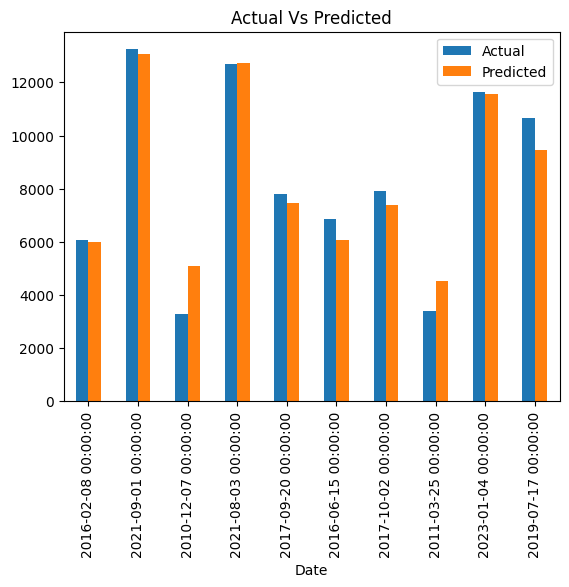

In [47]:
graph= df1.head(10)
graph.plot(kind='bar')
plt.title('Actual Vs Predicted')
plt.show()


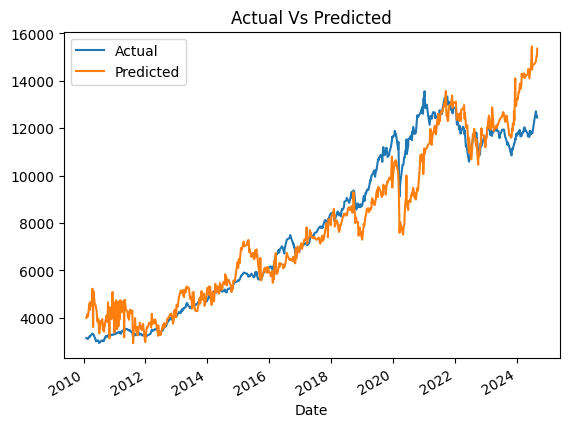

In [48]:
df1.plot()
plt.title('Actual Vs Predicted')
plt.show()

<a id='5.3'></a>
## **6.3. Lasso Regression**

In [49]:
LassoModel= Lasso()
LassoModel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.626e+09, tolerance: 3.460e+06
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [50]:
y_pred= LassoModel.predict(X_test)

In [51]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Absolute Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Square Error: { np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2_Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 784.9911948695348
Mean Absolute Error: 1118515.9508924661
Root Mean Square Error: 1057.5991447105403
R2_Score: 0.9055337595533086


>> From the above analysis, we can see that Lasso model performs slightly better than the linear model. This model reduce the influence of irreleveant features by shrinking their coefficients to zero. r2 score of 0.9055 indicates Lasso model explains a marginally greater proportion of the variance in the NZX50.

In [52]:
df2= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

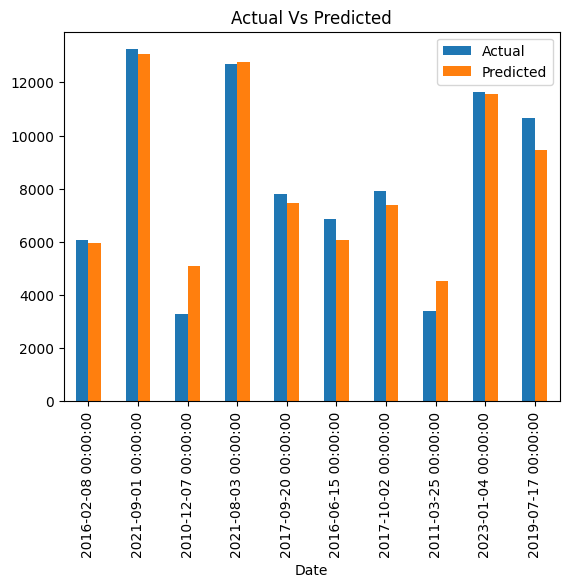

In [53]:
graph= df2.head(10)
graph.plot(kind='bar')
plt.title('Actual Vs Predicted')
plt.show()

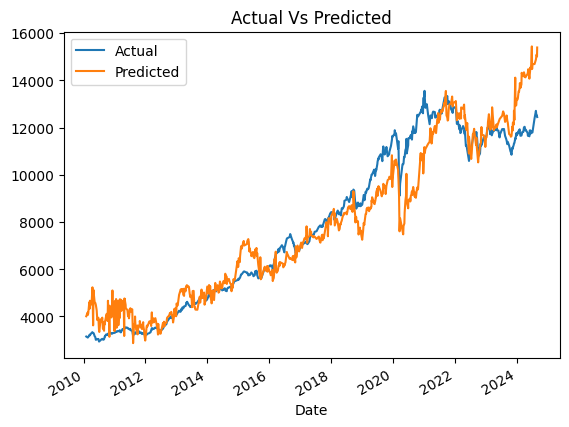

In [54]:
df2.plot()
plt.title('Actual Vs Predicted')
plt.show()

<a id='5.4'></a>
## **6.4. Logistic Regression**

In [55]:
X= df[[ 'sp500 Returns', 'sp500', 'asx200',
       'asx200 Returns', 'sp500_lags1', 'asx200_lags1', 'sp500_lags5',
       'asx200_lags5', 'sp500_Lags10', 'asx200_lags10', 'sp500_Lags20',
       'asx200_lags20', 'sp500 Direction',
       'asx200 Direction', 'sp500_Volume','asx200_Volume']]

y= df['nzx50 Direction']

In [56]:
df.columns

Index(['nzx50', 'nzx_Volume', 'sp500', 'sp500_Volume', 'asx200',
       'asx200_Volume', 'nzx50 Returns', 'sp500 Returns', 'asx200 Returns',
       'sp500_lags1', 'asx200_lags1', 'sp500_lags5', 'asx200_lags5',
       'sp500_Lags10', 'asx200_lags10', 'sp500_Lags20', 'asx200_lags20',
       'nzx50 Direction', 'sp500 Direction', 'asx200 Direction'],
      dtype='object')

In [57]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [58]:
logReg= LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [59]:
preds= logReg.predict(X_test)

In [60]:

acc= accuracy_score(y_test, preds)
print(f"Accuracy: {acc}")

Accuracy: 0.5431606905710491


>> Accuracy of 0.54 indicates that model can predict direction of NZX50 indices 54% correctly.

In [61]:
cm= confusion_matrix(y_test, preds)
cm

array([[108, 253],
       [ 91, 301]])

>> **True Negative:** 108. The model correctly predicted NZX50 directions as negative when it was actually negative. <br>
**False Positive:** 253. The model predicted NZX50 direction as positive but it was actually negative.<br>
**False Negative:** 91. The model predicted NZX50 direction as negative but it was actually positive.<br>
**True Positive:** 301. The model correctly predicted NZX50 directions as positive when it was actually positive.


In [62]:
cr= classification_report(y_test, preds)
print(cr)

              precision    recall  f1-score   support

           0       0.54      0.30      0.39       361
           1       0.54      0.77      0.64       392

    accuracy                           0.54       753
   macro avg       0.54      0.53      0.51       753
weighted avg       0.54      0.54      0.52       753



> Overall the model seem to performing better with predicting upward movement as compared to downward movement. The f1-score of 0.39 shows that model struggles predicting downard movement.

>> **Precison:** 0.54. About 54.3% of time when model predicted upward direction it was correct. <br>
**Recall:** 0.77. The model correctly identified 77% of upward movements. <br>
**f1-score:** 0.64. It suggests the model balance between Precision and Recall isn't ideal but relatively better for positive class predictions.

In [63]:
logReg= LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logReg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

>> Penalty has been added to the model to shrink some coefficents to zero and remove unwanted features and helps with overfitting of a data. <br>
Solver 'liblinear' has been used because it goes well with l1 and we have small datasets.

In [64]:
preds= logReg.predict(X_test)

In [65]:
acc= accuracy_score(y_test, preds)
acc

0.6361221779548473

>> Accuracy of 0.63 indicates that model can predict direction of NZX50 indices 63% correctly.

In [66]:
cm= confusion_matrix(y_test, preds)
cm

array([[224, 137],
       [137, 255]])

>> **True Negative:** 224. The model correctly predicted NZX50 directions as negative when it was actually negative. <br>
**False Positive:** 137. The model predicted NZX50 direction as positive but it was actually negative.<br>
**False Negative:** 137. The model predicted NZX50 direction as negative but it was actually positive.<br>
**True Positive:** 255. The model correctly predicted NZX50 directions as positive when it was actually positive.


In [67]:
cr= classification_report(y_test, preds)
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       361
           1       0.65      0.65      0.65       392

    accuracy                           0.64       753
   macro avg       0.64      0.64      0.64       753
weighted avg       0.64      0.64      0.64       753



> Overall the model seem to performing better with predicting both upward and downward movement.

>> **Precison:** 0.62. About 62% of time when model predicted downward direction it was correct. <br>
**Recall:** 0.65. The model correctly identified 65% of upward movements. <br>
**f1-score:** 0.65. It suggests the balance between Precision and Recall.

<a id='6'></a>
# **7. Conlusion**

From the above analysis, the impact of S&P 500 and ASX 200 on the NZX 50 has been investigated. Linear and Logistics regression models have been used to predict NZX 50 based on the lagged value of the other indices. <br>

The R-squared for both models were assessed to evaluate their performance and findings indicate that both global indices have influences on NZX 50, with the results supporting the investors interest in diversifying portfolio.

However, in future hyperparameter tuning should be done, and new features should be added such as interest rates, exchange rates, economic conditions etc,and other machine learning and neural networks should be used  to improve performance.

<a id='7'></a>
# **8. References**

> **yfinance Documentation:** https://pypi.org/project/yfinance/ <br>
**scikit-learn Documentation:** https://scikit-learn.org/stable/ <br>
**Supervised Learning Documentation:** https://scikit-learn.org/stable/supervised_learning.html <br>
**Model Evaluation Documentation:** https://scikit-learn.org/stable/modules/model_evaluation.html